<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Clusterizaci%C3%B3n_Algoritmo_K_means_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmo K-means (Core)**
El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

Enlace al dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

**Objetivo de la Actividad**

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.

**Descripción del Algoritmo K-means**

K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:

1. Asignación de clusters: Cada punto de datos se asigna al centroide más cercano.
2. Actualización de centroides: Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.

**Instrucciones**

1.  Carga del Dataset:

  – El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.

  – Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.

2. Selección de Variables:

  – Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

3. Implementación de K-means:

  – Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.

  – Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

4. Elbow Method:

  – Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

5. Interpretación de Clusters:

  – Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

6. Análisis de Resultados:

  – Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?

**Expansión del Algoritmo y Aplicaciones**

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

– Segmentación de Clientes: Agrupar a los clientes según su comportamiento de compra o interacción con un producto.

– Compresión de Imágenes: Reducir el número de colores en una imagen agrupando píxeles similares.

– Agrupación de Documentos: Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.

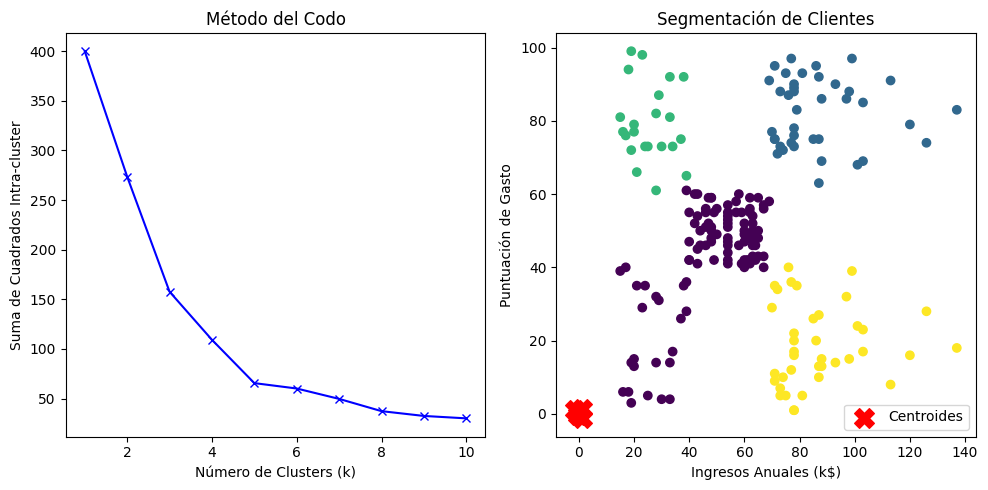

Características de los Clusters:
               Age         Annual Income (k$)          Spending Score (1-100)  \
              mean min max               mean min  max                   mean   
Cluster                                                                         
0        43.603960  18  70          48.168317  15   69              43.396040   
1        32.692308  27  40          86.538462  69  137              82.128205   
2        25.272727  18  35          25.727273  15   39              79.363636   
3        40.394737  19  59          87.000000  70  137              18.631579   

                                                            Gender  
        min max                                           <lambda>  
Cluster                                                             
0         3  61  {'Female': 0.594059405940594, 'Male': 0.405940...  
1        63  97  {'Female': 0.5384615384615384, 'Male': 0.46153...  
2        61  99  {'Female': 0.5909090909090909, 'Male'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Carga del Dataset
URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/Mall_Customers.csv'
df = pd.read_csv(URL)

# 2. Selección de Variables
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Escalamiento de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Método del Codo (Elbow Method)
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Gráfico del Método del Codo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados Intra-cluster')
plt.title('Método del Codo')

# 4. Clustering con K-means (k=4 basado en el método del codo)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de Clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
                      c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, marker='X', c='red', label='Centroides')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntuación de Gasto')
plt.title('Segmentación de Clientes')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Análisis de Características por Cluster
caracteristicas_clusters = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Gender': lambda x: x.value_counts(normalize=True).to_dict()
})

print("Características de los Clusters:")
print(caracteristicas_clusters)

# Interpretación de Clusters
def interpretar_cluster(cluster_info):
    interpretaciones = {
        0: "Cluster de Clientes de Bajo Ingreso y Bajo Gasto",
        1: "Cluster de Clientes de Alto Ingreso y Alto Gasto",
        2: "Cluster de Clientes de Ingresos Medios y Bajo Gasto",
        3: "Cluster de Clientes de Ingresos Medios y Alto Gasto"
    }
    return interpretaciones.get(cluster_info, "Cluster No Identificado")

for cluster, info in caracteristicas_clusters.iterrows():
    print(f"\n{interpretar_cluster(cluster)}:")
    print(f"Edad Promedio: {info['Age']['mean']:.2f}")
    print(f"Ingreso Anual Promedio: ${info['Annual Income (k$)']['mean']:.2f}k")
    print(f"Puntuación de Gasto Promedio: {info['Spending Score (1-100)']['mean']:.2f}")
    print(f"Distribución de Género: {info['Gender']}")

# **¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?**

**Insights de los Grupos de Clientes Identificados:**
La imagen muestra dos gráficos sobre la segmentación de clientes utilizando el método de clustering. Primero, observamos el gráfico de "Método del Codo", que sugiere que el número óptimo de clusters es alrededor de 5. El segundo gráfico muestra la segmentación en función de los ingresos anuales y la puntuación de gasto.

**Análisis de los Clusters:**
1.  **Cluster Verde (Ingresos bajos y gasto alto):**

  * **Comportamiento:** Clientes con ingresos anuales bajos pero una alta puntuación de gasto, probablemente priorizando el gasto en la tienda a pesar de sus ingresos limitados.

2.  **Cluster Azul Claro (Ingresos altos y gasto alto):**

  * **Comportamiento:** Clientes con altos ingresos y alta puntuación de gasto. Son los más valiosos para la tienda, pues tienen una alta capacidad de gasto.

3.  **Cluster Morado (Ingresos medios y gasto medio):**

  * **Comportamiento:** Clientes con ingresos y puntuaciones de gasto medios, representando un segmento estable que puede ser fidelizado.

4.  **Cluster Amarillo (Ingresos altos y gasto bajo):**

  * **Comportamiento:** Clientes con altos ingresos pero baja puntuación de gasto. Representan una oportunidad para incrementar las ventas mediante estrategias de marketing dirigidas.

5.  **Cluster Azul Oscuro (Ingresos bajos y gasto bajo):**

  * **Comportamiento:** Clientes con ingresos bajos y baja puntuación de gasto. Menos prioritarios en términos de marketing, pero aún representan una parte del mercado.

**Patrones o Comportamientos Comunes:**
* **Relación Ingresos-Gasto:** Los clientes con mayores ingresos tienden a tener una puntuación de gasto mayor, con algunas excepciones.

* **Segmentación Clara:** Los diferentes clusters muestran segmentos claramente diferenciados, lo cual es útil para diseñar estrategias de marketing y ventas específicas.

* **Oportunidades de Crecimiento:** Los clientes con altos ingresos pero baja puntuación de gasto son una oportunidad clara para campañas de marketing que podrían aumentar su gasto.